In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

# Understanding the dataset

In [3]:
data = pd.read_csv("../dataset/data.csv")

In [4]:
data.head()

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023,character
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka


In [3]:
# Decode image data from a file in Tensorflow
def decode_image(filename, image_type,channels=0):
    value = tf.io.read_file(filename)
    if image_type=="png":
        decoded_image = tf.io.decode_png(value,channels=channels)
    elif image_type=="jpeg":
        decoded_image = tf.io.decode_jpeg(value,channels=channels)
    else:
        decoded_image = tf.io.decode_image(value,channels=channels)
    
    return decoded_image

In [7]:
image = decode_image('../Images/character_01_ka/10962.png','png')

In [8]:
image.shape

TensorShape([32, 32, 1])

# Visualizing the dataset

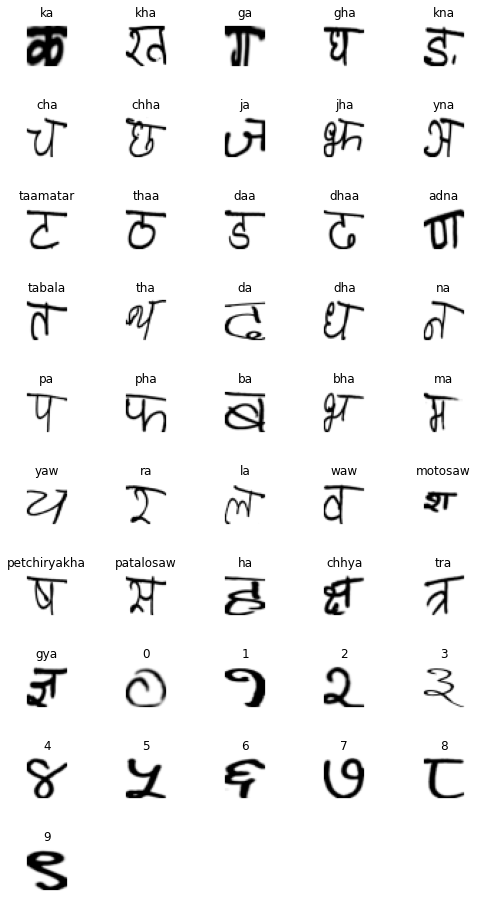

In [9]:
char_names = data.character.unique()  
rows =10;columns=5;
fig, ax = plt.subplots(rows,columns, figsize=(8,16))
for row in range(rows):
    for col in range(columns):
        ax[row,col].set_axis_off()
        if columns*row+col < len(char_names):
            x = data[data.character==char_names[columns*row+col]].iloc[0,:-1].values.reshape(32,32)
            x = x.astype("float64")
            #x/=255
            ax[row,col].imshow(x, cmap="binary")
            ax[row,col].set_title(char_names[columns*row+col].split("_")[-1])

            
plt.subplots_adjust(wspace=1, hspace=1)   
plt.show()

In [10]:
data.shape

(92000, 1025)

# Building the classification Model

In [4]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [5]:
#Normalizing X
X/=255.0
X.head()

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1014,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
labels = y.copy()

In [7]:
inputs = X.copy()

In [8]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(inputs,labels,test_size=0.25,random_state=42)

In [18]:
X_train.head()

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1014,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023
66838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71412,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53288,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37634,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
X_train.shape

(69000, 1024)

In [10]:
import sys

#Append the path to DL models
sys.path.insert(0,'../models/')

In [34]:
inputs_tensor=tf.convert_to_tensor(X_train.iloc[0:10,:])
inputs_tensor

<tf.Tensor: shape=(10, 1024), dtype=float64, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])>

In [11]:
%load_ext autoreload

In [12]:
%autoreload 2

In [14]:
from sklearn.preprocessing import LabelEncoder

n_classes = 46

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
y_train = tf.keras.utils.to_categorical(y_train, n_classes)
y_test = tf.keras.utils.to_categorical(y_test, n_classes)

In [93]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [19]:
# Instantiate an optimizer.
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
# Instantiate a loss function.
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Prepare the training dataset.
batch_size = 64

input_shape = [-1,32,32,1]

train_inputs=tf.convert_to_tensor(X_train)
#train_inputs = tf.reshape(train_inputs,input_shape)

train_outputs = tf.convert_to_tensor(y_train)

train_dataset = tf.data.Dataset.from_tensor_slices((train_inputs, train_outputs))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)


In [20]:
train_inputs

<tf.Tensor: shape=(69000, 1024), dtype=float64, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])>

In [22]:
train_outputs = tf.cast(train_outputs,dtype="float64")

In [23]:
train_outputs

<tf.Tensor: shape=(69000, 46), dtype=float64, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])>

In [13]:
train_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()

In [30]:
import os

batch_size = 64
checkpoint_path = "../Trained models/"
checkpoint_dirname = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 save_freq=5*batch_size,
                                                 verbose=1)

#cnn.save_weights(checkpoint_path.format(epoch=0))

In [24]:
test_inputs = tf.convert_to_tensor(X_test)
#test_inputs = tf.reshape(test_inputs,input_shape)

In [25]:
test_outputs = tf.convert_to_tensor(y_test)

In [30]:
test_inputs = tf.cast(test_inputs,dtype="float64")

In [32]:
test_outputs = tf.cast(test_outputs,dtype="float64")

In [1]:
train_test = tf.slice(train_inputs,
               begin=[1],
               size=[3])
train_test

NameError: name 'tf' is not defined

In [33]:
from CNN_v2 import CNNV2

cnn = CNNV2(32,46)
cnn

In [34]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [ ]:
output = cnn(train_inputs
output

In [39]:
history = cnn.fit(train_inputs,train_outputs,
                  batch_size=64, epochs=10,
                  validation_data=(test_inputs, test_outputs))

Epoch 1/10
1079/1079 [==============================] - 143s 131ms/step - loss: 2.7975 - accuracy: 0.3320 - val_loss: 1.6113 - val_accuracy: 0.6065
Epoch 2/10
1079/1079 [==============================] - 142s 131ms/step - loss: 1.5052 - accuracy: 0.5899 - val_loss: 1.1562 - val_accuracy: 0.6999
Epoch 3/10
1079/1079 [==============================] - 139s 129ms/step - loss: 1.1923 - accuracy: 0.6706 - val_loss: 0.9502 - val_accuracy: 0.7490
Epoch 4/10
1079/1079 [==============================] - 92s 86ms/step - loss: 1.0037 - accuracy: 0.7196 - val_loss: 0.7943 - val_accuracy: 0.7883
Epoch 5/10
1079/1079 [==============================] - 92s 85ms/step - loss: 0.8593 - accuracy: 0.7597 - val_loss: 0.6750 - val_accuracy: 0.8192
Epoch 6/10
1079/1079 [==============================] - 108s 100ms/step - loss: 0.7362 - accuracy: 0.7923 - val_loss: 0.5767 - val_accuracy: 0.8459
Epoch 7/10
1079/1079 [==============================] - 107s 99ms/step - loss: 0.6405 - accuracy: 0.8183 - val_loss:

In [40]:
score = cnn.evaluate(test_inputs, test_outputs, verbose=0)

In [42]:
print(f'test accuracy is: {score[1]*100}')

test accuracy is: 90.99565148353577


In [45]:
history.history

{'loss': [2.7974941730499268,
  1.5052436590194702,
  1.1922565698623657,
  1.0036815404891968,
  0.8592885732650757,
  0.736190676689148,
  0.6404812335968018,
  0.5528677701950073,
  0.4928083121776581,
  0.4381355941295624],
 'accuracy': [0.3319999873638153,
  0.5899275541305542,
  0.6705651879310608,
  0.7195941805839539,
  0.7596811652183533,
  0.7922608852386475,
  0.8182608485221863,
  0.8428695797920227,
  0.8585072755813599,
  0.8750869631767273],
 'val_loss': [1.6113053560256958,
  1.1561813354492188,
  0.9501962661743164,
  0.7942559719085693,
  0.6749903559684753,
  0.5767121315002441,
  0.4977031648159027,
  0.43034443259239197,
  0.38000527024269104,
  0.3373144567012787],
 'val_accuracy': [0.606521725654602,
  0.6999130249023438,
  0.7490000128746033,
  0.788304328918457,
  0.8192173838615417,
  0.8458695411682129,
  0.866826057434082,
  0.8849130272865295,
  0.8984347581863403,
  0.9099565148353577]}

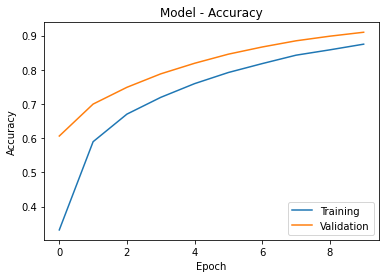

In [46]:
fig1, ax_acc = plt.subplots()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model - Accuracy')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

In [48]:
cnn.save("../Trained models/CNN-V2")

INFO:tensorflow:Assets written to: ../Trained models/CNN-V2\assets


loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()

In [18]:
import time

epochs = 21

for epoch in range(epochs):
    print("\nStart of epoch %d" % (epoch,))
    start_time = time.time()

    # Iterate over the batches of the dataset.
    for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):
        with tf.GradientTape() as tape:
            prediction = cnn(x_batch_train, training=True)
            loss_value = loss_fn(y_batch_train, prediction)
        grads = tape.gradient(loss_value, cnn.trainable_weights)
        optimizer.apply_gradients(zip(grads, cnn.trainable_weights))

        # Update training metric.
        train_acc_metric.update_state(y_batch_train, logits)

        # Log every 200 batches.
        if step % 200 == 0:
            print(
                "Training loss (for one batch) at step %d: %.4f"
                % (step, float(loss_value))
            )
            print("Seen so far: %d samples" % ((step + 1) * batch_size))

    # Display metrics at the end of each epoch.
    train_acc = train_acc_metric.result()
    print("Training acc over epoch: %.4f" % (float(train_acc),))

    # Reset training metrics at the end of each epoch
    train_acc_metric.reset_states()


Start of epoch 0
Training loss (for one batch) at step 0: 0.7782
Seen so far: 64 samples



KeyboardInterrupt



In [48]:
train_loss_results = []
train_accuracy_results = []

num_epochs = 21

for epoch in range(num_epochs):
    epoch_loss_avg = tf.keras.metrics.Mean()
    epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

      # Training loop - using batches of 64
    for x_train,y_train in train_dataset:
        # Optimize the model
        with tf.GradientTape() as tape:
            prediction = cnn(x_train, training=True)
            loss_value = loss_fn(y_train, prediction)
        #loss_value, grads = grad(model, x, y)
        grads = tape.gradient(loss_value, cnn.trainable_weights)
        optimizer.apply_gradients(zip(grads, cnn.trainable_weights))

        # Track progress
        epoch_loss_avg.update_state(loss_value)  # Add current batch loss
        # Compare predicted label to actual label
        # training=True is needed only if there are layers with different
        # behavior during training versus inference (e.g. Dropout).
        epoch_accuracy.update_state(y_train,logits)

      # End epoch
    train_loss_results.append(epoch_loss_avg.result())
    train_accuracy_results.append(epoch_accuracy.result())

    if epoch % 5 == 0:
        print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                    epoch_loss_avg.result(),
                                                                    epoch_accuracy.result()))

TypeError: Cannot convert 1e-07 to EagerTensor of dtype int64

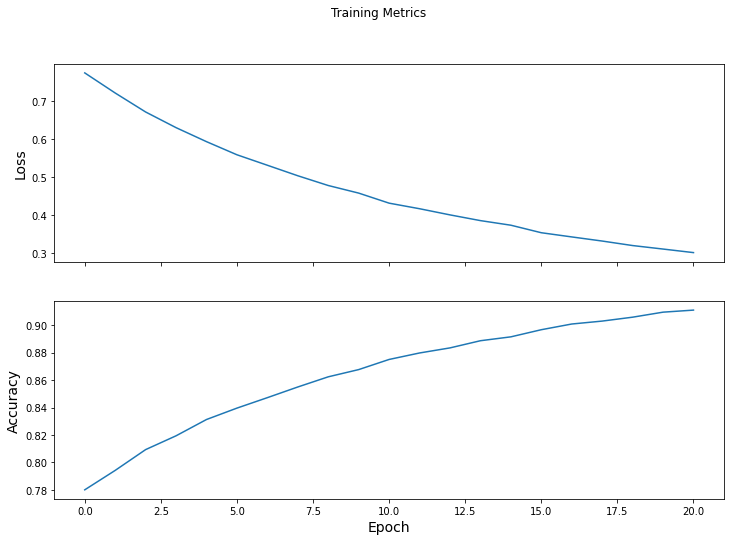

In [21]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()

In [22]:
test_inputs=tf.convert_to_tensor(X_test)
test_inputs = tf.reshape(test_inputs,input_shape)
test_dataset = tf.data.Dataset.from_tensor_slices(test_inputs)
test_dataset

<TensorSliceDataset shapes: (32, 32, 1), types: tf.float64>

In [23]:
test_accuracy = tf.keras.metrics.Accuracy()

In [1]:
image = decode_image('../Images/character_01_ka/10962.png','png')

NameError: name 'decode_image' is not defined

In [29]:
image = tf.cast(image,tf.int32)
image

<tf.Tensor: shape=(32, 32, 1), dtype=int32, numpy=
array([[[  0],
        [  0],
        [  0],
        ...,
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        ...,
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [ 49],
        ...,
        [143],
        [  0],
        [  0]],

       ...,

       [[  0],
        [  0],
        [ 28],
        ...,
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        ...,
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        ...,
        [  0],
        [  0],
        [  0]]])>

In [35]:
logits = cnn(image,training=False)
softmax = tf.nn.softmax(logits,name='softmax')
prediction = tf.math.argmax(softmax,axis=-1,name='prediction')
prediction

InvalidArgumentError: Exception encountered when calling layer "conv1" (type Conv2D).

cannot compute Conv2D as input #1(zero-based) was expected to be a int32 tensor but is a float tensor [Op:Conv2D]

Call arguments received:
  • inputs=tf.Tensor(shape=(1, 32, 32, 1), dtype=int32)

In [31]:
X_test

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1014,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023
73949,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16431,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22124,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47439,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58747,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72641,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
sample

pixel_0000    0.0
pixel_0001    0.0
pixel_0002    0.0
pixel_0003    0.0
pixel_0004    0.0
             ... 
pixel_1019    0.0
pixel_1020    0.0
pixel_1021    0.0
pixel_1022    0.0
pixel_1023    0.0
Name: 16431, Length: 1024, dtype: float64